# Ex1

Santiago Benites 54392

João Ferreira 55312

In [210]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random

# Use as a time series a sinusoidal function with 100 periods and 50 points per period, with:

In [211]:
# Generate the sinusoidal data
num_periods = 100
points_per_period = 50
total_points = num_periods * points_per_period
t = np.linspace(0, num_periods * 2 * np.pi, total_points)
sin_t = np.sin(t).reshape(-1, 1)

# Split the data into training and validation sets
split_fraction = 0.8
train_split = int(split_fraction * total_points)

x_train = sin_t[:train_split]
x_train = x_train.reshape(-1, points_per_period, 1)

x_val = sin_t[train_split:]
x_val = x_val.reshape(-1, points_per_period, 1)

# Split data into test set
start = int(total_points*0.4) #random.uniform(0, 1)
end = int(total_points*0.7)#random.uniform(start, 1)
x_test = sin_t#[start:end]
x_test = x_test.reshape(-1, points_per_period, 1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(80, 50, 1)
(20, 50, 1)
(100, 50, 1)


In [212]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


In [213]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(x=window.train_df,
                      y=window.train_df, 
                      epochs=MAX_EPOCHS, 
                      validation_data=(window.val_df, window.val_df),
                      callbacks=[early_stopping])
  return history

## 1) no noise, clean.

In [217]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(points_per_period, 1)),
    #tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    x=x_train,
    y=x_train,
    validation_data=(x_val, x_val),
    epochs=10
)



Epoch 1/10
3/3 [==============================] - 3s 210ms/step - loss: 0.5047 - val_loss: 0.4916
Epoch 2/10
3/3 [==============================] - 0s 28ms/step - loss: 0.4882 - val_loss: 0.4759
Epoch 3/10
3/3 [==============================] - 0s 27ms/step - loss: 0.4717 - val_loss: 0.4588
Epoch 4/10
3/3 [==============================] - 0s 27ms/step - loss: 0.4535 - val_loss: 0.4387
Epoch 5/10
3/3 [==============================] - 0s 29ms/step - loss: 0.4318 - val_loss: 0.4132
Epoch 6/10
3/3 [==============================] - 0s 30ms/step - loss: 0.4044 - val_loss: 0.3799
Epoch 7/10
3/3 [==============================] - 0s 29ms/step - loss: 0.3691 - val_loss: 0.3375
Epoch 8/10
3/3 [==============================] - 0s 28ms/step - loss: 0.3254 - val_loss: 0.2882
Epoch 9/10
3/3 [==============================] - 0s 31ms/step - loss: 0.2768 - val_loss: 0.2393
Epoch 10/10
3/3 [==============================] - 0s 29ms/step - loss: 0.2301 - val_loss: 0.1962


# Testing the Model

Input shape: (100, 50)
Output shape: (100, 50)


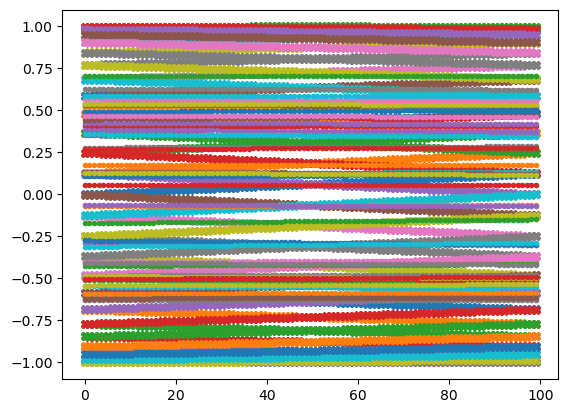

In [233]:
result = model(x_test)

print('Input shape:', x_test.shape)
print('Output shape:', model(x_test).shape)

x_test = x_test.squeeze()

plt.plot(x_test, label='Outputs', marker='X', zorder=-10)
plt.plot(result, label='Inputs', marker='.', zorder=-10)

plt.show()